# Currency Data Preprocessing for Ising Model

### Import Libraries

In [1]:
# Importing necessary libraries for data manipulation and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

### Define Constants

In [2]:
# Define constants for currency symbols and the path to the dataset
SYMBOLS = [
    'AUDUSD', 'EURUSD', 'GBPUSD', 'JPYUSD', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDCNY', 'USDCZK', 'USDDKK', 
    'USDHKD', 'USDHUF', 'USDIDR', 'USDILS', 'USDINR', 'USDKRW', 'USDMXN', 'USDMYR', 'USDNOK', 
    'USDPHP', 'USDRUB', 'USDSEK', 'USDSGD', 'USDTHB', 'USDTRY', 'USDZAR'
]
PATHNAME = '/Users/mizz/Library/CloudStorage/OneDrive-UniversityofBristol/Portfolio/Academic/Final_Year/Data/Currency_Pairs/'

# List of currency pairs to retain without inversion
TO_RETAIN = ['AUDUSD', 'EURUSD', 'GBPUSD', 'JPYUSD', 'NZDUSD']

### Data Reading and Processing Functions

In [3]:
"""
The "Close" prices are used as they represent the final price for the trading day,
which is a common reference for financial analyses.
"""

def read_csv(symbol):
    """Read a CSV file and return a DataFrame with dates and close prices."""
    df = pd.read_csv(f"{PATHNAME}{symbol}.csv")
    df["Date"] = pd.to_datetime(df["Date"])

    # Check if inversion is needed and rename
    if symbol not in TO_RETAIN:
        df["Close"] = 1/df["Close"]
        symbol = symbol[3:] + symbol[:3]  # Rename the symbol

    return df[["Date", "Close"]].rename(columns={"Close": symbol})

def merge_dataframes(symbols):
    """Merge DataFrames of all currency pairs into a single DataFrame."""
    merged_df = read_csv(symbols[0])
    for symbol in symbols[1:]:
        df = read_csv(symbol)
        merged_df = pd.merge(merged_df, df, on="Date", how="outer")
    return merged_df.sort_values(by="Date").reset_index(drop=True)

def plot_dataframe(df, symbols, start_date='2006-05-17'):
    """Plot the historical close prices of all the currency pairs with distinct colors."""
    plt.figure(figsize=(14, 7))
    
    # Initialise colormaps
    cmap_tab20b = cm.get_cmap('tab20b', 20)  # 20 distinct colors from tab20b
    cmap_tab20c = cm.get_cmap('tab20c', 20)  # 20 distinct colors from tab20c (extending to match sizes for ease of use)

    # Select colors based on the specified pattern: every 4th color starting from the first, then the second, and so on
    indices_pattern = np.array([0, 4, 8, 12, 16, 1, 5, 9, 13, 17, 2, 6, 10, 14, 18, 3, 7, 11, 15, 19])
    colors_tab20b_selected = cmap_tab20b(indices_pattern / 19)  # Adjust indices to [0, 1] range
    colors_tab20c_selected = cmap_tab20c(indices_pattern / 19)

    # Stack the selected colors from both colormaps
    colors = np.vstack([colors_tab20b_selected, colors_tab20c_selected])
    
    for symbol, color in zip(symbols, colors):
        plt.plot(df["Date"], df[symbol], label=symbol, color=color)
    
    # Set the x-axis limits to show only from 2003 or 2006 to 2024
    plt.xlim(pd.Timestamp(start_date), pd.Timestamp('2023-10-09'))

    # Add ticks for every year
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # Increase the font size for axis labels
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.legend(loc=(1.01, 0))
    # plt.savefig(f"Images/raw_data.svg", format="svg")
    plt.show()

def data_summary(df, symbols):
    for symbol in symbols:
        count = df[symbol].notna().sum()

        # Start date and "Close" value at start date
        start_index = df[symbol].first_valid_index()
        start_date = df.loc[start_index, "Date"]
        start_close = df.loc[start_index, symbol]
        if pd.notna(start_date):
            start_date = start_date.strftime('%Y-%m-%d')

        # End date and "Close" value at end date
        end_index = df[symbol].last_valid_index()
        end_date = df.loc[end_index, "Date"]
        end_close = df.loc[end_index, symbol]
        if pd.notna(end_date):
            end_date = end_date.strftime('%Y-%m-%d')

        missing_days = df[symbol].isna().sum()

        # Print information in three sections
        print(f"{symbol}: Start - [{start_date}, {start_close:.4f}], "
              f"End - [{end_date}, {end_close:.4f}], "
              f"Data Completeness - [{missing_days} missing days, {count} points]")

### Merge and Plot DataFrames

In [4]:
# Merge the DataFrames of all currency pairs
merged_df = merge_dataframes(SYMBOLS)

# Update SYMBOLS list based on the new column names
SYMBOLS = list(merged_df.columns)
SYMBOLS.remove('Date')
SYMBOLS

['AUDUSD',
 'EURUSD',
 'GBPUSD',
 'JPYUSD',
 'NZDUSD',
 'CADUSD',
 'CHFUSD',
 'CNYUSD',
 'CZKUSD',
 'DKKUSD',
 'HKDUSD',
 'HUFUSD',
 'IDRUSD',
 'ILSUSD',
 'INRUSD',
 'KRWUSD',
 'MXNUSD',
 'MYRUSD',
 'NOKUSD',
 'PHPUSD',
 'RUBUSD',
 'SEKUSD',
 'SGDUSD',
 'THBUSD',
 'TRYUSD',
 'ZARUSD']

/var/folders/8c/54xdylrd32q5q2h0h83vhjm00000gn/T/ipykernel_29563/4059904291.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_tab20b = cm.get_cmap('tab20b', 20)  # 20 distinct colors from tab20b
/var/folders/8c/54xdylrd32q5q2h0h83vhjm00000gn/T/ipykernel_29563/4059904291.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_tab20c = cm.get_cmap('tab20c', 20)  # 20 distinct colors from tab20c (extending to match sizes for ease of use)


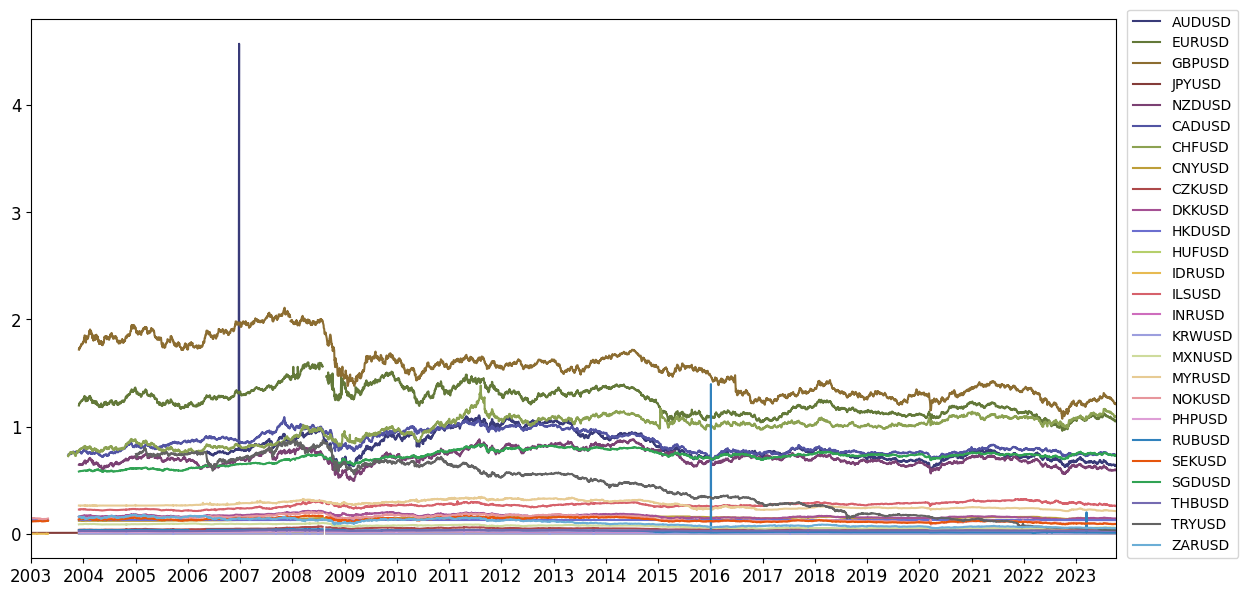

,Date,AUDUSD,EURUSD,GBPUSD,JPYUSD,NZDUSD,CADUSD,CHFUSD,CNYUSD,CZKUSD,...,MXNUSD,MYRUSD,NOKUSD,PHPUSD,RUBUSD,SEKUSD,SGDUSD,THBUSD,TRYUSD,ZARUSD
0,2003-01-01,NaN,NaN,NaN,0.008424,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003-01-02,NaN,NaN,NaN,0.008319,NaN,NaN,NaN,0.120817,NaN,...,NaN,NaN,0.142629,NaN,NaN,0.113489,NaN,NaN,NaN,NaN
2,2003-01-03,NaN,NaN,NaN,0.008356,NaN,NaN,NaN,0.120820,NaN,...,NaN,NaN,0.143928,NaN,NaN,0.114612,NaN,NaN,NaN,NaN
3,2003-01-06,NaN,NaN,NaN,0.008378,NaN,NaN,NaN,0.120820,NaN,...,NaN,NaN,0.144511,NaN,NaN,0.115296,NaN,NaN,NaN,NaN
4,2003-01-07,NaN,NaN,NaN,0.008318,NaN,NaN,NaN,0.120821,NaN,...,NaN,NaN,0.144102,NaN,NaN,0.114867,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5413,2023-10-03,0.636270,1.048075,1.209117,0.006673,0.594191,0.731192,1.089443,0.139278,0.042939,...,0.056617,0.212112,0.092118,0.017617,0.010125,0.090499,0.728157,0.027010,0.036414,0.052051
5414,2023-10-04,0.630890,1.047230,1.207846,0.006703,0.591349,0.729442,1.085812,0.138999,0.042739,...,0.055527,0.211775,0.091289,0.017596,0.009904,0.090289,0.728104,0.026961,0.036327,0.051819
5415,2023-10-05,0.632910,1.050707,1.213740,0.006713,0.591870,0.727580,1.090977,0.138883,0.043120,...,0.055623,0.211461,0.090869,0.017665,0.010054,0.090448,0.728980,0.027089,0.036292,0.051761
5416,2023-10-06,0.637105,1.054663,1.218769,0.006736,0.596641,0.729623,1.095782,0.138933,0.043203,...,0.054710,0.211640,0.091294,0.017658,0.009991,0.090877,0.731331,0.027075,0.036255,0.051263


In [5]:
# Display the merged DataFrame and plot for quick inspection
plot_dataframe(merged_df, SYMBOLS, '2003-01-01')
merged_df

In [6]:
def scientific_formatter(x):
    if pd.isnull(x):
        return 'NA'
    elif abs(x) < 1e-3:
        # Use .1e to get one significant figure, but avoid rounding to 0 for small non-zero values
        formatted = f"{x:.1e}"
        # Ensure it rounds correctly to one significant digit
        if 'e-0' in formatted or 'e+0' in formatted:
            # Extract the base and exponent parts
            base, exponent = formatted.split('e')
            # Round the base correctly
            base = str(round(float(base)))
            formatted = f"{base}e{exponent}"
        return formatted
    else:
        return f'{x:.3f}'

def generate_latex_table(df):
    # Define currency columns
    currency_columns = ['AUDUSD', 'EURUSD', 'GBPUSD', 'JPYUSD', 'NZDUSD', 'CADUSD', 'CHFUSD', 'CNYUSD', 'CZKUSD', 'SGDUSD', 'THBUSD', 'TRYUSD', 'ZARUSD']
    
    # Filter required columns and merge head and tail for preview
    currency_df = pd.concat([df.head(), df.tail()])
    currency_df = currency_df[['Date'] + currency_columns]
    
    # Formatting for LaTeX conversion
    currency_formatters = {col: scientific_formatter for col in currency_columns}
    currency_formatters['Date'] = lambda x: x.strftime('%Y-%m-%d')
    
    # Convert the subset to LaTeX format
    currency_latex = currency_df.to_latex(index=False, formatters=currency_formatters, escape=False, column_format='l *{14}{r}')
    data_lines = currency_latex.split("\n")[4:-3]  # Extract data lines
    
    # Apply transformations
    modified_head_lines, modified_tail_lines = transform_data_lines(data_lines)
    
    # Statistical analysis section
    stats_section = generate_stats_section(df, currency_columns)
    
    # Assemble the final LaTeX table
    latex_table = assemble_latex_table(modified_head_lines, modified_tail_lines, stats_section)
    
    # Write the final LaTeX code to a file
    with open('latex_table.tex', 'w') as file:
        file.write(latex_table)

def transform_data_lines(data_lines):
    head_lines = "\n".join(data_lines[:5])
    tail_lines = "\n".join(data_lines[5:])
    
    modified_head_lines = "\n".join([insert_dots(line) for line in head_lines.split("\n")])
    modified_tail_lines = "\n".join([insert_dots(line) for line in tail_lines.split("\n")])
    
    return modified_head_lines, modified_tail_lines

def insert_dots(line):
    parts = line.split('&')
    if len(parts) > 10:  # Ensuring there are at least 11 columns to insert \dots after the 10th entry
        # Insert \dots with spacing and & on both sides, adjust for the existing space by trimming parts as needed
        parts[10] = r' \dots & ' + parts[10].strip() 
        return '&'.join(parts)
    return line

def generate_stats_section(df, currency_columns):
    stats_df = df[currency_columns].describe().loc[['count', 'mean', '50%', 'std']]
    stats_formatters = {col: scientific_formatter for col in stats_df.columns}
    stats_latex = stats_df.to_latex(formatters=stats_formatters, escape=False)
    
    # Adjust the 'Count' line and other terms
    stats_lines = stats_latex.split('\n')[4:-2]  # Extract stats data lines
    modified_stats_lines = adjust_count_line_for_latex([replace_stats_terms(insert_dots(line)) for line in stats_lines])
    
    return "\n".join(modified_stats_lines)

def adjust_count_line_for_latex(lines):
    adjusted_lines = []
    for line in lines:
        if "Count" in line:  # Identify the 'Count' line
            parts = line.split("&")
            adjusted_parts = [parts[0].strip()]  # Keep the 'Count' label as is, ensure to strip spaces
            for part in parts[1:]:  # Iterate over each value after 'Count'
                part = part.strip()  # Trim spaces from current part
                if part.endswith("\\"):  # Check if part is the last one in the line
                    part = part[:-2].strip()  # Remove trailing "\\" and trim spaces again
                try:
                    # Convert to integer and format, ensure no decimal places
                    adjusted_part = "{:0.0f}".format(float(part))
                except ValueError:
                    # If conversion fails, use the original part
                    adjusted_part = part
                adjusted_parts.append(adjusted_part)
            adjusted_line = " & ".join(adjusted_parts) + " \\\\"  # Reassemble the line
            adjusted_lines.append(adjusted_line)
        else:
            adjusted_lines.append(line)
    return adjusted_lines

def replace_stats_terms(line):
    replacements = {
        '50%': 'Median',
        'count': 'Count',
        'mean': 'Mean',
        'std': 'Std'
    }
    for old, new in replacements.items():
        line = line.replace(old, new)
    return line

def assemble_latex_table(modified_head_lines, modified_tail_lines, stats_section):
    dots_line = r"\dots & \dots & \dots & \dots & \dots & \dots & \dots & \dots & \dots & \dots & \dots & \dots & \dots & \dots & \dots & \dots \\"
    latex_table = r"""\begin{table*}[htbp]
  \centering
  \scriptsize
  \begin{tabular}{l *{15}{r}}
    \toprule
    Date & AUD & EUR & GBP & JPY & NZD & CAD & CHF & CNY & CZK & \dots & SEK & SGD & THB & TRY & ZAR \\
    \midrule
"""
    latex_table += modified_head_lines + "\n" + dots_line + "\n" + modified_tail_lines
    latex_table += r"""
    \midrule
    \multicolumn{15}{l}{\textbf{Statistical Analysis}} \\
    \midrule
"""
    latex_table += stats_section
    latex_table += r"""
  \end{tabular}
  \caption{Historical Forex Data for Multiple Currencies: This table represents the raw historical forex data extracted from Yahoo Finance, showcasing daily close values across various currencies over a span of two decades. The 'NaN' entries indicate days where trading data was not available. All values are in USD. (5418 rows x 26 columns)}
  \label{table:raw_data}
\end{table*}
"""
    return latex_table

# generate_latex_table(merged_df)

In [7]:
data_summary(merged_df, SYMBOLS)

AUDUSD: Start - [2006-05-16, 0.7671], End - [2023-10-09, 0.6360], Data Completeness - [890 missing days, 4528 points]
EURUSD: Start - [2003-12-01, 1.1965], End - [2023-10-09, 1.0544], Data Completeness - [266 missing days, 5152 points]
GBPUSD: Start - [2003-12-01, 1.7186], End - [2023-10-09, 1.2178], Data Completeness - [254 missing days, 5164 points]
JPYUSD: Start - [2003-01-01, 0.0084], End - [2023-10-09, 0.0067], Data Completeness - [28 missing days, 5390 points]
NZDUSD: Start - [2003-12-01, 0.6443], End - [2023-10-09, 0.5975], Data Completeness - [265 missing days, 5153 points]
CADUSD: Start - [2003-09-17, 0.7317], End - [2023-10-06, 0.7296], Data Completeness - [199 missing days, 5219 points]
CHFUSD: Start - [2003-09-17, 0.7243], End - [2023-10-06, 1.0958], Data Completeness - [201 missing days, 5217 points]
CNYUSD: Start - [2003-01-02, 0.1208], End - [2023-10-09, 0.1372], Data Completeness - [176 missing days, 5242 points]
CZKUSD: Start - [2003-12-01, 0.0371], End - [2023-10-06, 

### Remove Data Before Specific Date

In [8]:
# Define the start date for analysis to remove earlier data points
start_date = "2006-05-16"
# Remove data before the specified start date and reset the DataFrame index
master_df = merged_df[merged_df["Date"] >= start_date].sort_values(by="Date").reset_index(drop=True)
# Display the head of the DataFrame with data removed up to the start date
master_df.head()

,Date,AUDUSD,EURUSD,GBPUSD,JPYUSD,NZDUSD,CADUSD,CHFUSD,CNYUSD,CZKUSD,...,MXNUSD,MYRUSD,NOKUSD,PHPUSD,RUBUSD,SEKUSD,SGDUSD,THBUSD,TRYUSD,ZARUSD
0,2006-05-16,0.767106,1.285000,1.887398,0.009111,0.626017,0.903342,0.827952,0.125109,0.045650,...,0.090868,0.278342,0.163921,0.019283,0.037045,0.136655,0.635324,0.026344,0.691563,0.157978
1,2006-05-17,0.759417,1.274194,1.882495,0.009016,0.623014,0.896781,0.823384,0.125141,0.044926,...,0.089518,0.280143,0.163121,0.019283,0.037106,0.135351,0.632911,0.026151,0.677048,0.155429
2,2006-05-18,0.764000,1.285099,1.893294,0.009017,0.622200,0.893176,0.829875,0.124994,0.045348,...,0.089682,0.278753,0.164639,0.019283,0.037037,0.137261,0.633633,0.026281,0.667557,0.155087
3,2006-05-19,0.757174,1.276699,1.880017,0.008956,0.621891,0.894935,0.821355,0.124844,0.045216,...,0.089783,0.276786,0.163773,0.019029,0.036964,0.136606,0.631632,0.026217,0.676590,0.154297
4,2006-05-22,0.753409,1.285298,1.885085,0.008972,0.623014,0.895496,0.829669,0.124751,0.045393,...,0.088936,0.275664,0.164490,0.019019,0.036955,0.137618,0.631114,0.026101,0.651466,0.153243


In [9]:
data_summary(master_df, SYMBOLS)

AUDUSD: Start - [2006-05-16, 0.7671], End - [2023-10-09, 0.6360], Data Completeness - [11 missing days, 4528 points]
EURUSD: Start - [2006-05-16, 1.2850], End - [2023-10-09, 1.0544], Data Completeness - [26 missing days, 4513 points]
GBPUSD: Start - [2006-05-16, 1.8874], End - [2023-10-09, 1.2178], Data Completeness - [14 missing days, 4525 points]
JPYUSD: Start - [2006-05-16, 0.0091], End - [2023-10-09, 0.0067], Data Completeness - [26 missing days, 4513 points]
NZDUSD: Start - [2006-05-16, 0.6260], End - [2023-10-09, 0.5975], Data Completeness - [10 missing days, 4529 points]
CADUSD: Start - [2006-05-16, 0.9033], End - [2023-10-06, 0.7296], Data Completeness - [12 missing days, 4527 points]
CHFUSD: Start - [2006-05-16, 0.8280], End - [2023-10-06, 1.0958], Data Completeness - [14 missing days, 4525 points]
CNYUSD: Start - [2006-05-16, 0.1251], End - [2023-10-09, 0.1372], Data Completeness - [9 missing days, 4530 points]
CZKUSD: Start - [2006-05-16, 0.0456], End - [2023-10-06, 0.0432],

### Interpolation and Log Returns

PHPUSD: Interpolated Data around key dates:
        Date    PHPUSD  Interpolated
0 2006-05-16  0.019283      0.019283
1 2006-05-17  0.019283      0.019198
2 2006-05-18  0.019283      0.019114
3 2006-05-19  0.019029      0.019029
PHPUSD: Log Returns around key dates:
        Date    PHPUSD
0 2006-05-16       NaN
1 2006-05-17 -0.004386
2 2006-05-18 -0.004406
3 2006-05-19 -0.004425


/var/folders/8c/54xdylrd32q5q2h0h83vhjm00000gn/T/ipykernel_29563/4059904291.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_tab20b = cm.get_cmap('tab20b', 20)  # 20 distinct colors from tab20b
/var/folders/8c/54xdylrd32q5q2h0h83vhjm00000gn/T/ipykernel_29563/4059904291.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_tab20c = cm.get_cmap('tab20c', 20)  # 20 distinct colors from tab20c (extending to match sizes for ease of use)


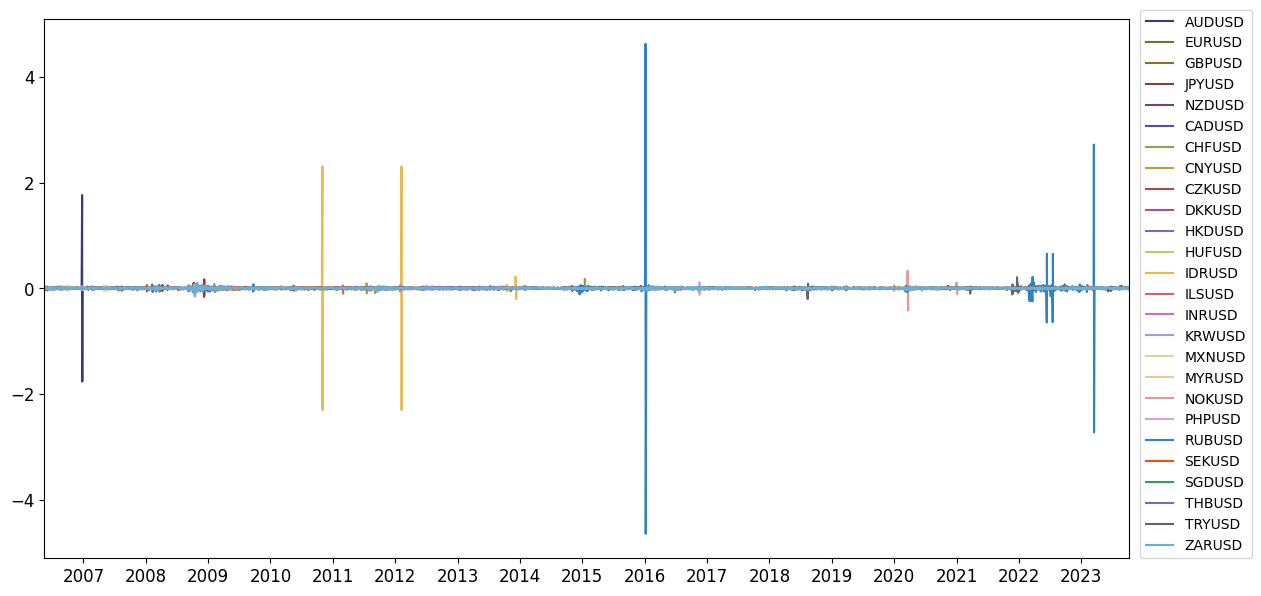

AUDUSD: Start - [2006-05-17, -0.0101], End - [2023-10-09, -0.0017], Data Completeness - [0 missing days, 4538 points]
EURUSD: Start - [2006-05-17, -0.0084], End - [2023-10-09, -0.0002], Data Completeness - [0 missing days, 4538 points]
GBPUSD: Start - [2006-05-17, -0.0026], End - [2023-10-09, -0.0008], Data Completeness - [0 missing days, 4538 points]
JPYUSD: Start - [2006-05-17, -0.0104], End - [2023-10-09, -0.0045], Data Completeness - [0 missing days, 4538 points]
NZDUSD: Start - [2006-05-17, -0.0048], End - [2023-10-09, 0.0015], Data Completeness - [0 missing days, 4538 points]
CADUSD: Start - [2006-05-17, -0.0073], End - [2023-10-09, 0.0028], Data Completeness - [0 missing days, 4538 points]
CHFUSD: Start - [2006-05-17, -0.0055], End - [2023-10-09, 0.0044], Data Completeness - [0 missing days, 4538 points]
CNYUSD: Start - [2006-05-17, 0.0003], End - [2023-10-09, -0.0127], Data Completeness - [0 missing days, 4538 points]
CZKUSD: Start - [2006-05-17, -0.0160], End - [2023-10-09, 0.

In [10]:
def calculate_log_returns(df, symbols):
    log_returns_df = df.copy()

    for symbol in symbols:
        # Replace consecutive identical values with NaN, but keep the first occurrence
        series = df[symbol]
        series_to_interpolate = series.mask(series.duplicated(keep='first') & series.duplicated(keep='last'))

        # Interpolate and fill the first and last elements if needed
        interpolated_series = series_to_interpolate.interpolate(method='linear', limit_direction='both')

        # Debugging for PHPUSD before log return calculation
        if symbol == 'PHPUSD':
            debug_data = df.loc[df['Date'].between('2006-05-16', '2006-05-19'), ['Date', symbol]]
            debug_data['Interpolated'] = interpolated_series.loc[df['Date'].between('2006-05-16', '2006-05-19')]
            print("PHPUSD: Interpolated Data around key dates:")
            print(debug_data)

        # Calculate log returns on the interpolated data
        log_returns_df[symbol] = np.log(interpolated_series).diff()

        # Debugging for PHPUSD after log return calculation
        if symbol == 'PHPUSD':
            debug_log_returns = log_returns_df.loc[df['Date'].between('2006-05-16', '2006-05-19'), ['Date', symbol]]
            print("PHPUSD: Log Returns around key dates:")
            print(debug_log_returns)

    # Forward fill any remaining NaNs and remove the first row
    log_returns_df.replace(0, np.nan, inplace=True)
    log_returns_df.ffill(inplace=True)
    log_returns_df = log_returns_df.iloc[1:]

    return log_returns_df

# Calculate the log returns for financial analysis
log_returns_df = calculate_log_returns(master_df, SYMBOLS)
# Plot the log returns to visualise the changes over time
plot_dataframe(log_returns_df, SYMBOLS)
# Display the log returns DataFrame for quick inspection
data_summary(log_returns_df, SYMBOLS)

In [11]:
log_returns_df

,Date,AUDUSD,EURUSD,GBPUSD,JPYUSD,NZDUSD,CADUSD,CHFUSD,CNYUSD,CZKUSD,...,MXNUSD,MYRUSD,NOKUSD,PHPUSD,RUBUSD,SEKUSD,SGDUSD,THBUSD,TRYUSD,ZARUSD
1,2006-05-17,-0.010075,-0.008445,-0.002601,-0.010423,-0.004809,-0.007290,-0.005532,0.000250,-0.015986,...,-0.014971,0.006450,-0.004889,-0.004386,0.001631,-0.009588,-0.003805,-0.007376,-0.021212,-0.016265
2,2006-05-18,0.006017,0.008522,0.005720,0.000090,-0.001308,-0.004027,0.007853,-0.001176,0.009366,...,0.001837,-0.004974,0.009259,-0.004406,-0.001854,0.014012,0.001140,0.004955,-0.014118,-0.002205
3,2006-05-19,-0.008975,-0.006558,-0.007037,-0.006830,-0.000498,0.001967,-0.010320,-0.001199,-0.002921,...,0.001122,-0.007083,-0.005271,-0.004425,-0.001961,-0.004779,-0.003163,-0.002415,0.013441,-0.005105
4,2006-05-22,-0.004985,0.006712,0.002692,0.001793,0.001805,0.000627,0.010071,-0.000749,0.003896,...,-0.009472,-0.004060,0.004366,-0.000571,-0.000259,0.007377,-0.000821,-0.004421,-0.037841,-0.006858
5,2006-05-23,-0.003234,-0.005460,-0.004251,-0.006082,0.001746,-0.007227,-0.005543,0.000250,-0.001678,...,-0.010413,-0.001185,-0.007946,-0.000855,0.002961,-0.004668,-0.000252,-0.000365,0.029083,-0.015042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4534,2023-10-03,-0.011641,-0.008029,-0.008390,-0.002078,-0.009043,-0.007530,-0.002640,-0.002273,-0.010259,...,-0.015238,-0.004613,-0.016045,-0.001216,-0.008133,-0.011851,-0.004664,-0.009498,0.000695,-0.017474
4535,2023-10-04,-0.008491,-0.000807,-0.001051,0.004407,-0.004796,-0.002395,-0.003339,-0.002004,-0.004674,...,-0.019450,-0.001590,-0.009038,-0.001162,-0.022031,-0.002324,-0.000073,-0.001781,-0.002386,-0.004472
4536,2023-10-05,0.003197,0.003315,0.004867,0.001516,0.000882,-0.002557,0.004745,-0.000834,0.008886,...,0.001739,-0.001481,-0.004613,0.003896,0.014968,0.001763,0.001202,0.004702,-0.000980,-0.001113
4537,2023-10-06,0.006606,0.003758,0.004135,0.003382,0.008028,0.002805,0.004395,0.000361,0.001921,...,-0.016551,0.000846,0.004670,-0.000389,-0.006264,0.004731,0.003220,-0.000515,-0.001016,-0.009669


### Historical Context Dictionary

In [23]:
# Define a dictionary containing significant financial events and their dates for each currency pair.
# This information can be used later to annotate or highlight these periods in visualisations.
historical_context = {
    'AUDUSD': [
        ('2009-12-01', '2012-12-31', 'Eurozone Debt Crisis'),
        ('2015-01-01', '2015-12-31', 'Chinese Economic Slowdown')
    ],
    'EURUSD': [
        ('2009-12-01', '2012-12-31', 'Eurozone Debt Crisis'),
        ('2016-01-01', '2016-12-31', 'Brexit Referendum')
    ],
    'GBPUSD': [
        ('2009-12-01', '2012-12-31', 'Eurozone Debt Crisis'),
        ('2016-01-01', '2016-12-31', 'Brexit Referendum')
    ],
    'JPYUSD': [
        ('2013-01-01', '2016-12-31', 'Abenomics Policies in Japan')
    ],
    'NZDUSD': [
        ('2014-01-01', '2015-12-31', 'Commodity Price Decline')
    ],
    'CADUSD': [
        ('2014-01-01', '2016-12-31', 'Oil Price Decline')
    ],
    'CHFUSD': [
        ('2011-01-01', '2011-12-31', 'Swiss Franc Appreciation'),
        ('2015-01-01', '2015-12-31', 'Swiss Franc Uncapping')
    ],
    'CNYUSD': [
        ('2015-01-01', '2016-12-31', 'Chinese Economic Slowdown'),
        ('2019-01-01', '2020-12-31', 'US-China Trade War')
    ],
    'CZKUSD': [
        ('2017-01-01', '2018-12-31', 'Czech Economic Growth')
    ],
    'DKKUSD': [
         ('2015-01-01', '2015-12-31', 'Swiss Franc Uncapping')
    ],
    'HKDUSD': [
        ('2019-01-01', '2020-12-31', 'Hong Kong Protests and Pandemic Impact'),
        ('2020-01-01', '2020-12-31', 'National Security Law')
    ],
    'HUFUSD': [
        ('2015-01-01', '2015-12-31', 'Hungarian Migrant Crisis')
    ],
    'IDRUSD': [
        ('2013-01-01', '2014-12-31', 'Taper Tantrum'),
        ('2018-01-01', '2018-12-31', 'Emerging Market Currency Sell-off')
    ],
    'ILSUSD': [
        ('2014-01-01', '2014-12-31', 'Gaza Conflict')
    ],
    'INRUSD': [
        ('2013-01-01', '2013-12-31', 'Taper Tantrum'),
        ('2016-01-01', '2016-12-31', 'Indian Demonetization')
    ],
    'KRWUSD': [
        ('2017-01-01', '2017-12-31', 'North Korea Tensions')
    ],
    'MXNUSD': [
        ('2016-01-01', '2016-12-31', 'US Presidential Election')
    ],
    'MYRUSD': [
        ('2015-01-01', '2016-12-31', '1MDB Scandal')
    ],
    'NOKUSD': [
        ('2014-01-01', '2015-12-31', 'Oil Price Decline')
    ],
    'PHPUSD': [
        ('2013-01-01', '2016-12-31', 'South China Sea Dispute')
    ],
    'RUBUSD': [
        ('2014-01-01', '2015-12-31', 'Russian Ruble Crisis')
    ],
    'SEKUSD': [
        ('2015-01-01', '2015-12-31', 'Swedish Negative Interest Rates')
    ],
    'SGDUSD': [
        ('2016-01-01', '2016-12-31', 'Singaporean Economic Slowdown')
    ],
    'THBUSD': [
        ('2014-01-01', '2014-12-31', 'Thai Political Crisis')
    ],
    'TRYUSD': [
        ('2018-01-01', '2018-12-31', 'Turkish Lira Crisis')
    ],
    'ZARUSD': [
        ('2015-01-01', '2016-12-31', 'South African Economic Challenges')
    ]
}

### Outlier Detection Function

In [24]:
# Function to calculate the Median Absolute Deviation (MAD) for outlier detection
def calculate_mad(data_series):
    """Calculate the Median Absolute Deviation (MAD) - a robust measure of variability."""
    return np.median(np.abs(data_series - np.median(data_series)))

# Function to detect outliers in a data series based on the MAD
def detect_outliers(data_series, mad, multiplier=3):
    """Identify outliers in a data series using MAD and a multiplier threshold."""
    median = np.median(data_series)
    outlier_mask = np.abs(data_series - median) > multiplier * mad
    return data_series[outlier_mask]

### Plotting Log Returns with Outliers and Contextual Periods

In [25]:
def plot_log_returns_with_outliers(df, symbol, mad_multiplier, context_periods, save_svg=False):
    """Plot log returns for a currency pair, highlight outliers, and annotate key historical periods."""
    # Calculate MAD and identify outliers
    mad = calculate_mad(df[symbol])
    outliers = detect_outliers(df[symbol], mad, mad_multiplier)
    
    # Plot the log returns and highlight outliers
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(df['Date'], df[symbol], label='Log Returns', color='blue', alpha=0.6)
    ax.scatter(df['Date'][outliers.index], outliers, color='red', label='Potential Outliers', alpha=0.7)
    
    # Annotate periods for financial crisis and pandemic
    annotate_period(ax, '2007-07-01', '2008-12-31', 'Financial Crisis (2007-2008)', 'red')
    annotate_period(ax, '2020-01-01', '2021-12-31', 'COVID-19 Pandemic (2020-2021)', 'blue')
    
    # Annotate additional historical periods from the context dictionary
    for start_date, end_date, event_name in context_periods[symbol]:
        annotate_period(ax, start_date, end_date, event_name, 'orange')
    
    # Finalise the plot with titles, labels, and layout adjustments
    ax.set_title(f'{symbol} Log Returns with {len(outliers)} Outliers (MAD Multiplier: {mad_multiplier:.1f})', fontsize=20)
    # ax.set_xlabel('Date')
    ax.set_ylabel('Log Returns', fontsize=20)
    ax.legend(fontsize=16)
    
    # Add ticks for every year
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(DateFormatter("%Y"))
    ax.set_xlim([df['Date'].min(), df['Date'].max()])
    
    plt.xticks(rotation=45, fontsize=18)
    plt.yticks(fontsize=18)
    plt.tight_layout()

    if save_svg:
        plt.savefig("plot.svg", format="svg")
    else:
        plt.show()

# Helper function to annotate periods on the plot
def annotate_period(ax, start, end, label, colour):
    """Add a shaded region to the plot to indicate a significant period."""
    ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=colour, alpha=0.3, label=label)

### Interactive Plot with MAD Multiplier Slider

In [26]:
import ipywidgets as widgets
from IPython.display import display

def interactive_plot_log_returns_with_outliers(df, symbol, context_periods):
    """Create an interactive plot with a slider to adjust the MAD multiplier and visualise outliers."""
    def update_plot(mad_multiplier):
        # Update the plot based on the current MAD multiplier value
        plot_log_returns_with_outliers(df, symbol, mad_multiplier, context_periods)
        # plot_log_returns_with_outliers(df, symbol, mad_multiplier=23, context_periods=context_periods, save_svg=True)

    # Create a slider for the MAD multiplier with a specified range and increment
    mad_multiplier_slider = widgets.FloatSlider(
        value=3,  # Default value
        min=1,    # Minimum value
        max=100,  # Maximum value
        step=0.5, # Step size
        description='MAD Multiplier:', # Description of the slider
        continuous_update=True,
        layout=widgets.Layout(width='100%')  # Full width layout
    )
    
    # Display the interactive slider and update the plot upon value change
    interactive_widget = widgets.interactive(update_plot, mad_multiplier=mad_multiplier_slider)
    display(interactive_widget)

# Call the function to display the interactive plot for 'AUDUSD' with historical contexts
interactive_plot_log_returns_with_outliers(log_returns_df, 'CHFUSD', historical_context)

interactive(children=(FloatSlider(value=3.0, description='MAD Multiplier:', layout=Layout(width='100%'), min=1…

The delineation of temporal boundaries for significant market events is pivotal for a rigorous economic analysis. The interval commencing on July 1, 2007, and concluding on June 30, 2009, is frequently referenced as the epoch of the financial crisis. This period encapsulates the inception of the crisis, marked by the destabilisation of the subprime mortgage sector in the United States and the subsequent systemic shock following the collapse of Lehman Brothers in September 2008. While this terminus post quem and terminus ante quem capture the acute phase of the crisis, the reverberations and economic ramifications extended well into late 2009, warranting a potential extension of the observed timeframe to encapsulate the full economic recovery trajectory.

In the context of the COVID-19 pandemic, the onset date of January 1, 2020, is deemed appropriate as it signifies the juncture when the contagion commenced its global proliferation, engendering pronounced market fluctuations. The pandemic's denouement is more nebulous due to its protracted and heterogeneously distributed impacts across the globe. A pragmatic approach may entail extending the shaded region to the present, capturing the totality of the pandemic's economic footprint. However, for a more focused analysis, one could consider the advent of widespread vaccination campaigns in late 2021 as a provisional endpoint. This inflection point is characterised by a palpable attenuation in market volatility and a gradual resumption of economic activity, marking a pivotal transition in the pandemic's economic influence.

For the purposes of this analysis, the end date for the COVID-19 pandemic-related market impact will be provisionally set to December 31, 2021. This date reflects a significant milestone in the global vaccination effort and coincides with the relaxation of restrictions in numerous economies, signaling a tentative return to pre-pandemic economic conditions.

### Threshold MAD Multiplier Dictionary

In [27]:
# Define a dictionary with custom MAD multipliers for each currency symbol
# These values are used as thresholds for outlier detection in the subsequent analysis
# 'None' if no outlier filtering for XXXUSD
threshold_mad_multiplier = {
    'AUDUSD': 23,
    'EURUSD': None,
    'GBPUSD': None,
    'JPYUSD': None,
    'NZDUSD': None,
    'CADUSD': None,
    'CHFUSD': None,
    'CNYUSD': 24.5,
    'CZKUSD': None,
    'DKKUSD': None,
    'HKDUSD': None,
    'HUFUSD': None,
    'IDRUSD': 79,
    'ILSUSD': 15.5,
    'INRUSD': None,
    'KRWUSD': None,
    'MXNUSD': None,
    'MYRUSD': 19,
    'NOKUSD': 21.5,
    'PHPUSD': None,
    'RUBUSD': 61.5,
    'SEKUSD': None,
    'SGDUSD': None,
    'THBUSD': None,
    'TRYUSD': 49,
    'ZARUSD': None
}

### Outlier Filtering and Interpolation

/var/folders/8c/54xdylrd32q5q2h0h83vhjm00000gn/T/ipykernel_29563/4059904291.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_tab20b = cm.get_cmap('tab20b', 20)  # 20 distinct colors from tab20b
/var/folders/8c/54xdylrd32q5q2h0h83vhjm00000gn/T/ipykernel_29563/4059904291.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_tab20c = cm.get_cmap('tab20c', 20)  # 20 distinct colors from tab20c (extending to match sizes for ease of use)


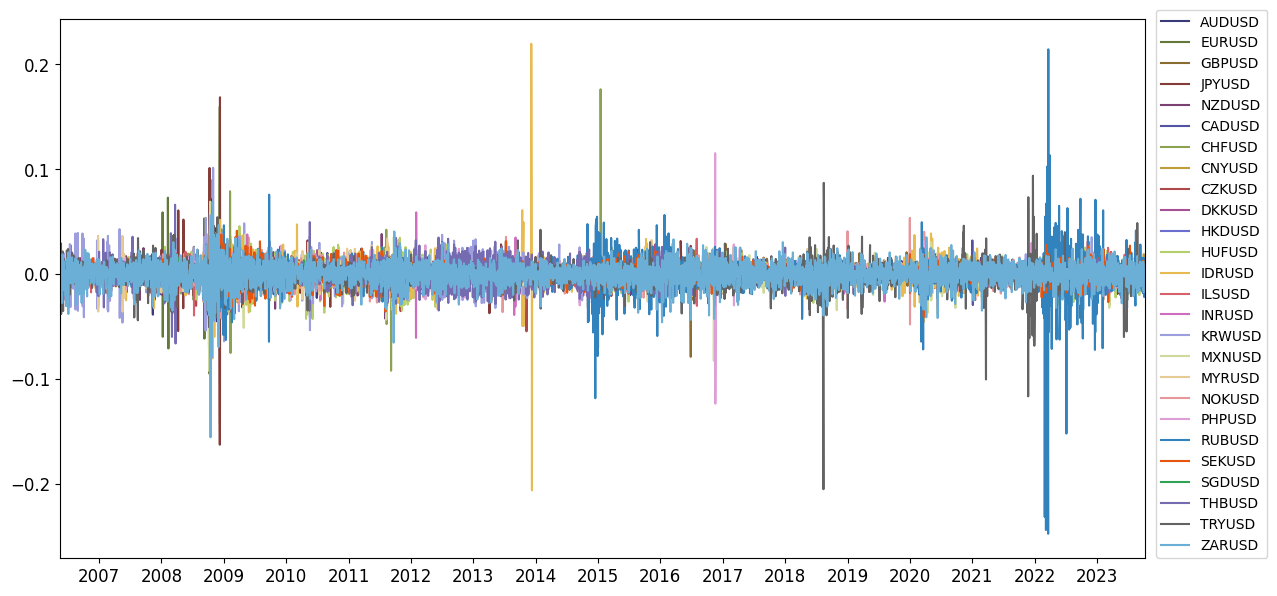

,Date,AUDUSD,EURUSD,GBPUSD,JPYUSD,NZDUSD,CADUSD,CHFUSD,CNYUSD,CZKUSD,...,MXNUSD,MYRUSD,NOKUSD,PHPUSD,RUBUSD,SEKUSD,SGDUSD,THBUSD,TRYUSD,ZARUSD
1,2006-05-17,-0.010075,-0.008445,-0.002601,-0.010423,-0.004809,-0.007290,-0.005532,0.000250,-0.015986,...,-0.014971,0.006450,-0.004889,-0.004386,0.001631,-0.009588,-0.003805,-0.007376,-0.021212,-0.016265
2,2006-05-18,0.006017,0.008522,0.005720,0.000090,-0.001308,-0.004027,0.007853,-0.001176,0.009366,...,0.001837,-0.004974,0.009259,-0.004406,-0.001854,0.014012,0.001140,0.004955,-0.014118,-0.002205
3,2006-05-19,-0.008975,-0.006558,-0.007037,-0.006830,-0.000498,0.001967,-0.010320,-0.001199,-0.002921,...,0.001122,-0.007083,-0.005271,-0.004425,-0.001961,-0.004779,-0.003163,-0.002415,0.013441,-0.005105
4,2006-05-22,-0.004985,0.006712,0.002692,0.001793,0.001805,0.000627,0.010071,-0.000749,0.003896,...,-0.009472,-0.004060,0.004366,-0.000571,-0.000259,0.007377,-0.000821,-0.004421,-0.037841,-0.006858
5,2006-05-23,-0.003234,-0.005460,-0.004251,-0.006082,0.001746,-0.007227,-0.005543,0.000250,-0.001678,...,-0.010413,-0.001185,-0.007946,-0.000855,0.002961,-0.004668,-0.000252,-0.000365,0.029083,-0.015042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4534,2023-10-03,-0.011641,-0.008029,-0.008390,-0.002078,-0.009043,-0.007530,-0.002640,-0.002273,-0.010259,...,-0.015238,-0.004613,-0.016045,-0.001216,-0.008133,-0.011851,-0.004664,-0.009498,0.000695,-0.017474
4535,2023-10-04,-0.008491,-0.000807,-0.001051,0.004407,-0.004796,-0.002395,-0.003339,-0.002004,-0.004674,...,-0.019450,-0.001590,-0.009038,-0.001162,-0.022031,-0.002324,-0.000073,-0.001781,-0.002386,-0.004472
4536,2023-10-05,0.003197,0.003315,0.004867,0.001516,0.000882,-0.002557,0.004745,-0.000834,0.008886,...,0.001739,-0.001481,-0.004613,0.003896,0.014968,0.001763,0.001202,0.004702,-0.000980,-0.001113
4537,2023-10-06,0.006606,0.003758,0.004135,0.003382,0.008028,0.002805,0.004395,0.000361,0.001921,...,-0.016551,0.000846,0.004670,-0.000389,-0.006264,0.004731,0.003220,-0.000515,-0.001016,-0.009669


In [28]:
# Copy the DataFrame to apply outlier filtering
filtered_df = log_returns_df.copy()

# Process each symbol to filter outliers based on the MAD multiplier threshold
for symbol in SYMBOLS:
    # Skip the filtering process if threshold is None or NaN
    if threshold_mad_multiplier[symbol] is None or pd.isna(threshold_mad_multiplier[symbol]):
        continue
    
    # Calculate the median and MAD for the current symbol
    symbol_median = log_returns_df[symbol].median()
    symbol_mad = (log_returns_df[symbol] - symbol_median).abs().median()
    
    # Fetch the MAD multiplier threshold for the current symbol
    symbol_threshold = threshold_mad_multiplier[symbol]
    
    # Determine the acceptable range based on the median and MAD
    mask = (log_returns_df[symbol] > symbol_median - symbol_threshold * symbol_mad) & \
           (log_returns_df[symbol] < symbol_median + symbol_threshold * symbol_mad)
    
    # Replace outliers with NaN for interpolation
    temp_series = log_returns_df[symbol].copy()
    temp_series[~mask] = np.nan
    filtered_df[symbol] = temp_series.interpolate()
    
    # Handle any NaN values at the beginning or end of the series
    if filtered_df[symbol].isna().iloc[0]:
        filtered_df.loc[filtered_df.index[0], symbol] = log_returns_df[symbol].iloc[0]
    if filtered_df[symbol].isna().iloc[-1]:
        filtered_df.loc[filtered_df.index[-1], symbol] = log_returns_df[symbol].iloc[-1]
    
    # Interpolate remaining NaN values linearly
    filtered_df[symbol].interpolate(method='linear', inplace=True)

# Plot the filtered DataFrame to visualise the data after outlier removal
plot_dataframe(filtered_df, SYMBOLS)
# Display the filtered DataFrame for a quick inspection
filtered_df

In [29]:
# generate_latex_table(filtered_df)

### Thresholding DataFrame

In [30]:
# Apply thresholding to the DataFrame to convert currency values to their signs (1, -1)
thresholded_df = filtered_df.copy()
for symbol in SYMBOLS:
    thresholded_df[symbol] = np.sign(filtered_df[symbol]).astype(int)

# Display the thresholded DataFrame to inspect the changes
thresholded_df

,Date,AUDUSD,EURUSD,GBPUSD,JPYUSD,NZDUSD,CADUSD,CHFUSD,CNYUSD,CZKUSD,...,MXNUSD,MYRUSD,NOKUSD,PHPUSD,RUBUSD,SEKUSD,SGDUSD,THBUSD,TRYUSD,ZARUSD
1,2006-05-17,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,1,-1,-1,1,-1,-1,-1,-1,-1
2,2006-05-18,1,1,1,1,-1,-1,1,-1,1,...,1,-1,1,-1,-1,1,1,1,-1,-1
3,2006-05-19,-1,-1,-1,-1,-1,1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,1,-1
4,2006-05-22,-1,1,1,1,1,1,1,-1,1,...,-1,-1,1,-1,-1,1,-1,-1,-1,-1
5,2006-05-23,-1,-1,-1,-1,1,-1,-1,1,-1,...,-1,-1,-1,-1,1,-1,-1,-1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4534,2023-10-03,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1,-1
4535,2023-10-04,-1,-1,-1,1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4536,2023-10-05,1,1,1,1,1,-1,1,-1,1,...,1,-1,-1,1,1,1,1,1,-1,-1
4537,2023-10-06,1,1,1,1,1,1,1,1,1,...,-1,1,1,-1,-1,1,1,-1,-1,-1


### Convert DataFrame to Matrix

In [31]:
# Convert the DataFrame into a numpy matrix, excluding the 'Date' column
data_matrix = thresholded_df.drop(columns=["Date"]).to_numpy()

# Output the shape of the matrix to verify its dimensions
data_matrix.shape

(4538, 26)

### Find Zero Elements in Matrix

In [32]:
# Locate any zero elements within the data matrix
zero_elements = np.where(data_matrix == 0)

# Check if there are any zero elements and print their indices
if zero_elements[0].size > 0:
    print(f"Found zero elements at the following indices: {list(zip(zero_elements[0], zero_elements[1]))}")
else:
    print("No zero elements found in the data_matrix.")

# Store the number of zero elements for additional checks or processing
num_zero_elements = zero_elements[0].size

# Print the total number of zero elements found
if num_zero_elements > 0:
    print(f"Found {num_zero_elements} zero elements in the data_matrix.")
else:
    print("No zero elements found in the data_matrix.")

No zero elements found in the data_matrix.
No zero elements found in the data_matrix.


### Save DataFrame to Excel

In [33]:
# Save the filtered DataFrame to a CSV file for statistical analysis
filtered_df.to_csv("Results/log_returns.csv", index=False)

# Save the thresholded DataFrame to a CSV file in the 'Results' subfolder for further analysis or record-keeping
thresholded_df.to_csv("Results/data_matrix.csv", index=False)

# Confirm that the DataFrame has been saved successfully
print("The thresholded DataFrame has been saved to 'Results/data_matrix.csv'.")

The thresholded DataFrame has been saved to 'Results/data_matrix.csv'.
